In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def using_contours(image):
    # image = cv2.imread(src_img_path)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    threshold_value = 150
    pp, binary = cv2.threshold(gray, threshold_value, 255, cv2.THRESH_BINARY)
    contours,qq = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    mask = np.zeros_like(binary)
    for contour in contours:
        cv2.drawContours(mask, [contour], -1, (255), thickness=cv2.FILLED)
    segmented_image = cv2.bitwise_and(image, image, mask=mask)
    plt.imshow(segmented_image)
    return segmented_image

In [3]:
# import the necessary packages
from skimage import exposure

def using_match_histogram(img, ref_img):
	# load the source and reference images
	print("[INFO] loading source and reference images...")
	src = img
	ref = ref_img
	# determine if we are performing multichannel histogram matching
	# and then perform histogram matching itself
	print("[INFO] performing histogram matching...")
	multi = 2 if src.shape[-1] > 1 else None
	matched = exposure.match_histograms(src, ref, channel_axis=multi)
	plt.imshow(matched)
	return matched

In [4]:
def using_adaptive_threshold(src):
    # Convert the image to HSV color space
    hsv = cv2.cvtColor(src, cv2.COLOR_RGB2HSV)

    # Separate the value channel from the HSV image
    v = hsv[:,:,2]

    # Apply adaptive thresholding to create a mask for the shadow regions
    mask = cv2.adaptiveThreshold(v, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV, 11, 2)
    # Soften the edges of the mask with a Gaussian blur
    mask = cv2.GaussianBlur(mask, (21,21), 0)
    plt.imshow(mask)    

    # Invert the mask so that the shadow regions are white
    mask = cv2.bitwise_not(mask)

    # Blend the original image with a white image using the mask as the alpha channel
    result = cv2.merge((v,v,v)) # Create a grayscale version of the image
    result = cv2.addWeighted(result, 0.9, cv2.merge((mask,mask,mask)), 0.1, 0)
    return result

In [53]:
def match_shadows_and_contrast(source_image, target_image):
# Convert the images to the HSV color space
  s_hsv = cv2.cvtColor(source_image, cv2.COLOR_RGB2HSV)
  t_hsv = cv2.cvtColor(target_image, cv2.COLOR_RGB2HSV)
  
  # Get the shadows and highlights of the source image
  src_shadows = s_hsv[:, :, 2] < 128
  src_highlights = s_hsv[:, :, 2] > 255 / 2
  # print(src_shadows, src_highlights)

  # Set the shadows and highlights of the target image to match the source image
  t_hsv[src_shadows] = 0
  t_hsv[src_highlights] = 255
  t_hsv = cv2.GaussianBlur(t_hsv, (21,21), 0)
  # t_hsv = cv2.bitwise_not(t_hsv)
  # print(t_hsv)

    
  # Convert the target image back to the BGR color space
  result = cv2.cvtColor(t_hsv, cv2.COLOR_HSV2RGB)
  # result = cv2.cvtColor(result, cv2.COLOR_RGB2GRAY)
  plt.imshow(result)
  
  gray_src = cv2.cvtColor(source_image, cv2.COLOR_RGB2GRAY)
  result = cv2.addWeighted(source_image, 0.8, result, 0.2, -100)
  
  # Return the target image
  # return cv2.cvtColor(result, cv2.COLOR_GRAY2RGB)
  return result

In [ ]:
from numpy.linalg import norm

def brightness(img):
    if len(img.shape) == 3:
        return np.average(norm(img, axis=2)) / np.sqrt(3)
    else:
        return np.average(img)
        
def change_brightness(img, value):
    # plt.imshow(img)
    hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
    h, s, v = cv2.split(hsv)
    v = cv2.add(v,value)
    v[v > 255] = 255
    v[v < 0] = 0
    final_hsv = cv2.merge((h, s, v))
    img = cv2.cvtColor(final_hsv, cv2.COLOR_HSV2RGB)
    return img


pp=brightness(src_img)
sample_wallpaper = PRODUCTS+'/Wallpapers/64_damask wallpaper texture-seamless.jpg'
layer1=cv2.imread(sample_wallpaper)
layer1=cv2.cvtColor(layer1,cv2.COLOR_BGR2RGB)
est=brightness(layer1)
val=(est-pp)*0.2
sample_wallpaper=change_brightness(layer1,-val)

### Illuminating the overlayed img

In [46]:
test_img = "img3"

src_img = cv2.cvtColor(cv2.imread("../inputs/src_imgs/{}.jpeg".format(test_img, test_img)), cv2.COLOR_BGR2RGB)
out_img = cv2.cvtColor(cv2.imread("../outs/{}.jpg".format(test_img)), cv2.COLOR_BGR2RGB)

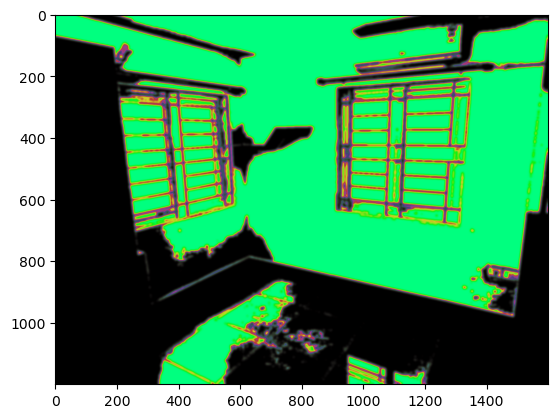

In [54]:
illumination = match_shadows_and_contrast(src_img, out_img)

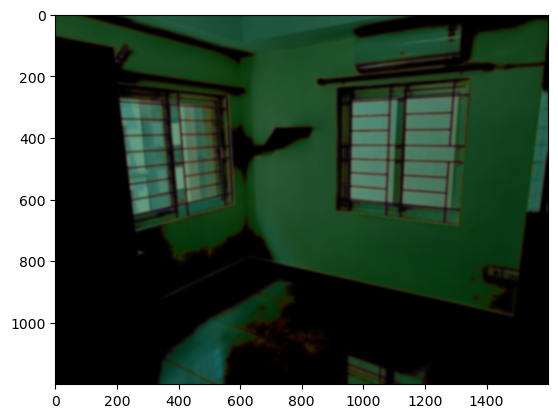

In [55]:
plt.imshow(illumination)

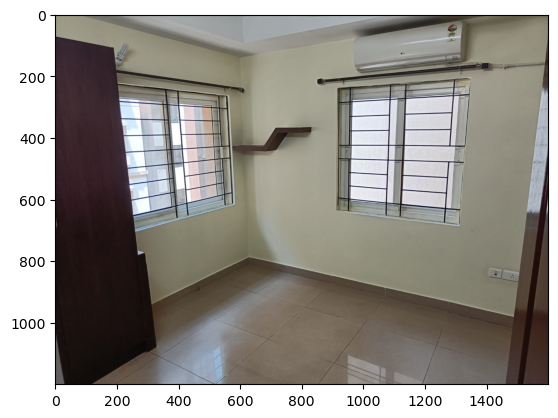

In [26]:
plt.imshow(src_img)